In [ ]:
# Housing Price Prediction

Goal: predict house prices (price) based on the provided features.

In this notebook I:
1. Analyzed the problem and stated initial assumptions,
2. Cleaned the data and extracted useful information,
3. Built and trained two models: Linear Regression and Random Forest,
4. Made predictions on the test data,
5. Checked how the results align with my initial assumptions,
6. Documented the work with clear comments and markdown explanations.

Initial assumptions:
1. Larger area → higher price.
2. Bedrooms, bathrooms, stories: more rooms and more stories → higher price.
3. Mainroad, guestroom, basement: presence of these features may increase price.
4. Hot water heating, air conditioning: amenities are likely to increase price.
5. Furnishing status: furnished houses may be priced higher compared to semi-furnished or unfurnished ones.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [9]:
csv_path = r"C:\Users\user\Desktop\Housing.csv"

try:
    df = pd.read_csv(csv_path)
except Exception as e:
    raise RuntimeError(f"Failed to upload CSV. Error:\n{e}")

print("Shape:", df.shape)
df.head()


Shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
print("\nInfo:")
df.info()

print("\nMissing values:")
print(df.isna().sum())



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            

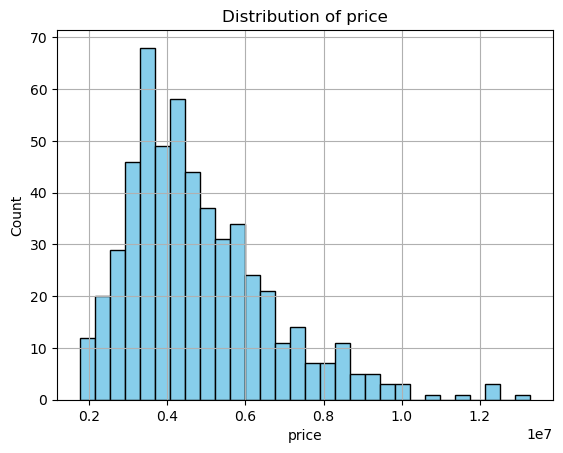

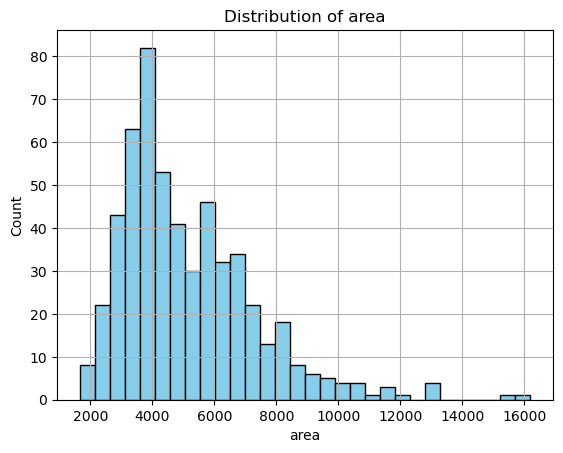

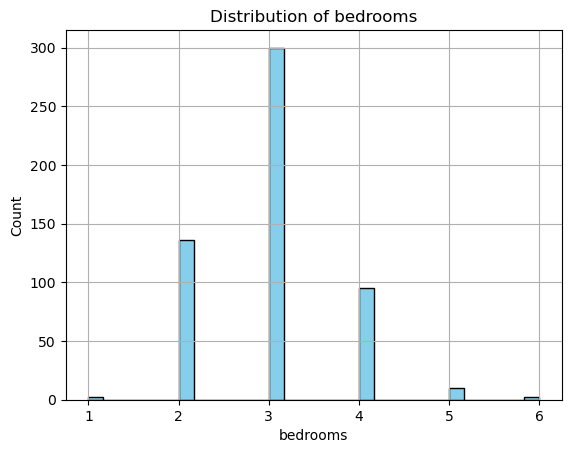

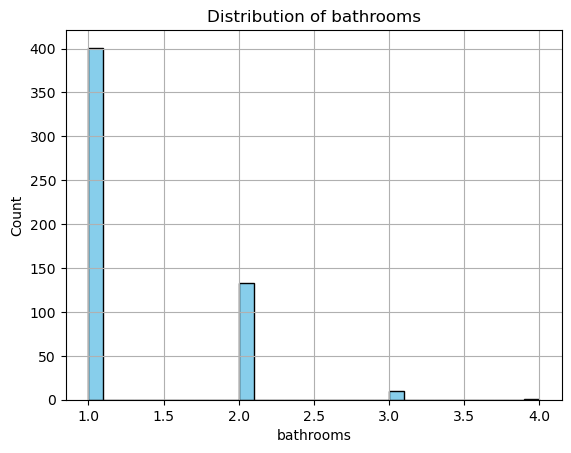

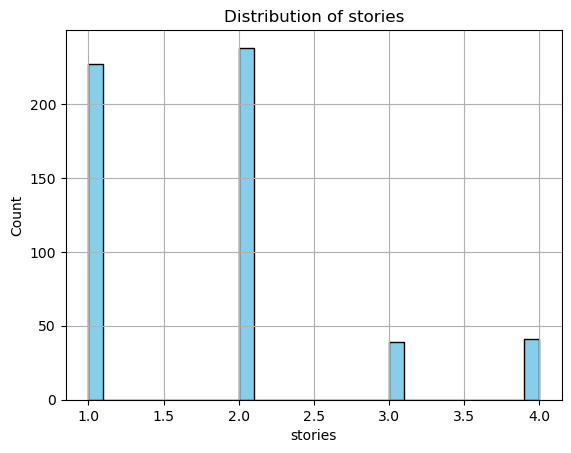

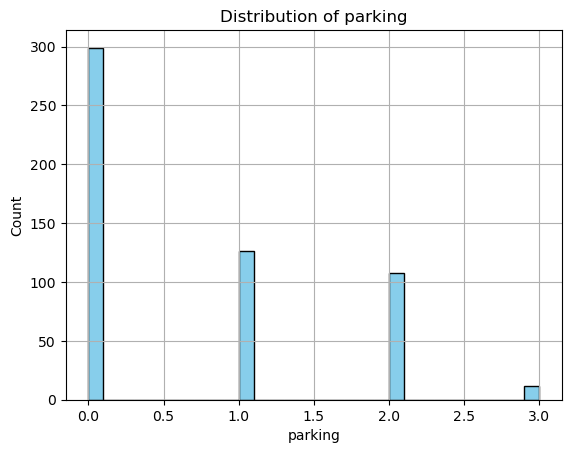

In [4]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()

for col in numeric_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()


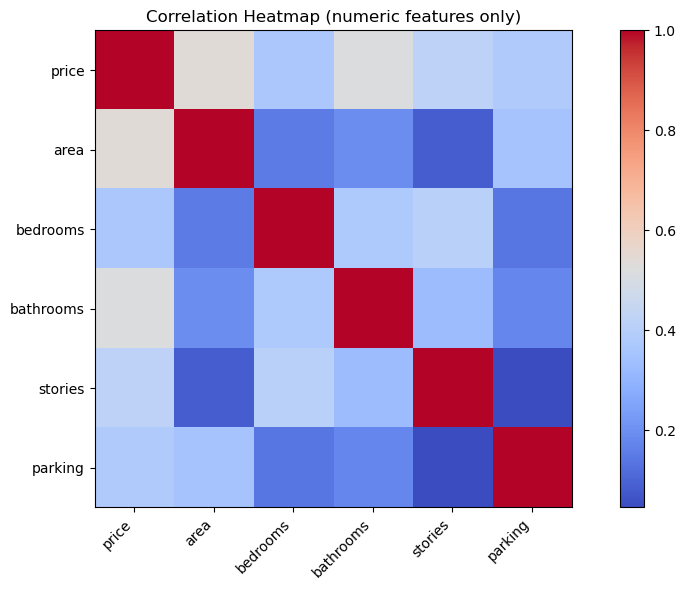

In [16]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (numeric features only)")
plt.tight_layout()
plt.show()


In [18]:
for col in numeric_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

Numeric columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
Target: price


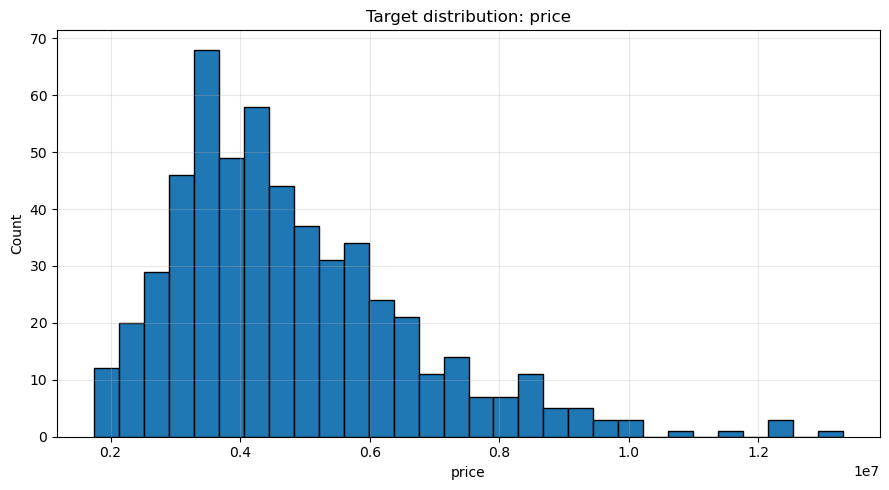

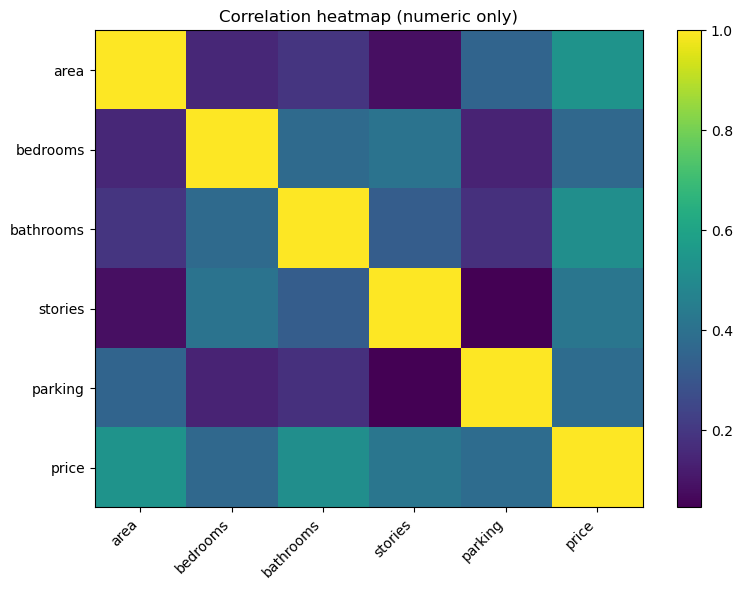

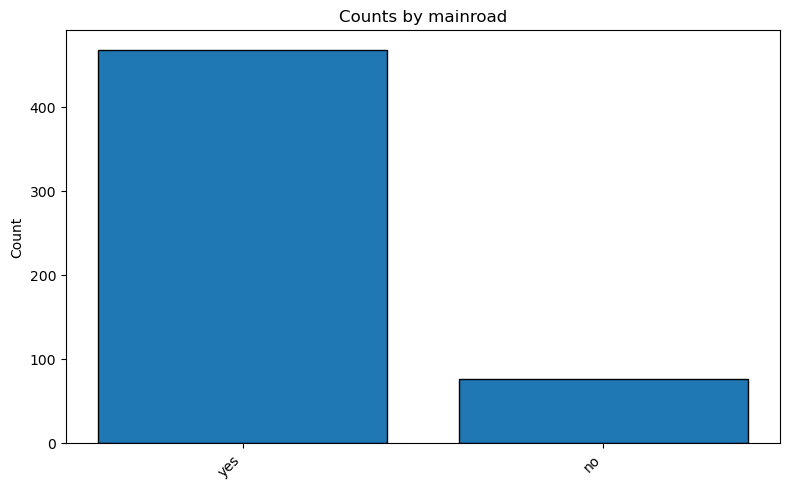

In [11]:
# features
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols     = df.select_dtypes(exclude='number').columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", cat_cols)

# Работа с таргет (предпочтительно 'price')
if "price" in df.columns:
    target = "price"
elif len(numeric_cols) > 0:
    target = numeric_cols[0]
else:
    target = None

print("Target:", target)


# Target
if target is not None:
    plt.figure(figsize=(9,5))
    plt.hist(df[target].dropna(), bins=30, edgecolor="black")
    plt.title(f"Target distribution: {target}")
    plt.xlabel(target)
    plt.ylabel("Count")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Target not found — skip target distribution.")


if target in numeric_cols:
    feature_nums = [c for c in numeric_cols if c != target]
else:
    feature_nums = numeric_cols

# Colums for correlation
if target is not None and target in numeric_cols:
    cols_for_corr = feature_nums + [target]
else:
    cols_for_corr = feature_nums

if len(cols_for_corr) >= 2:
    corr2 = df[cols_for_corr].corr()
    plt.figure(figsize=(8,6))
    plt.imshow(corr2, cmap='viridis', aspect="auto")
    plt.colorbar()
    plt.xticks(range(len(corr2.columns)), corr2.columns, rotation=45, ha="right")
    plt.yticks(range(len(corr2.columns)), corr2.columns)
    plt.title("Correlation heatmap (numeric only)")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap.")

# Frequencies for one categorical
if len(cat_cols) > 0:
    first_cat = cat_cols[0]
    counts = df[first_cat].value_counts(dropna=False)
    plt.figure(figsize=(8,5))
    plt.bar(counts.index.astype(str), counts.values, edgecolor="black")
    plt.title(f"Counts by {first_cat}")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("ℹ️ No categorical columns found — skip counts plot.")


In [14]:

target = 'price' if 'price' in df.columns else numeric_cols[-1]

X = df.drop(columns=[target]).select_dtypes(include='number')
y = df[target]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [15]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"MSE : {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE : {mae_lr:.2f}")
print(f"R^2 : {r2_lr:.4f}")


Linear Regression:
MSE : 2292721545725.37
RMSE: 1514173.55
MAE : 1127483.35
R^2 : 0.5464


In [16]:
from sklearn.ensemble import RandomForestRegressor

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
model_rf.fit(X_train2, y_train2)

y_pred_rf = model_rf.predict(X_test2)

mse_rf = mean_squared_error(y_test2, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test2, y_pred_rf)
r2_rf = r2_score(y_test2, y_pred_rf)

print("Random Forest:")
print(f"MSE : {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE : {mae_rf:.2f}")
print(f"R^2 : {r2_rf:.4f}")


Random Forest:
MSE : 2635279404876.73
RMSE: 1623354.37
MAE : 1160947.71
R^2 : 0.4786


In [11]:

    "MAE":   [mae_lr, mae_rf],
    "R2":    [r2_lr, r2_rf],
}).sort_values("R2", ascending=False)

results


,model,MSE,RMSE,MAE,R2
0,LinearRegression,2.292722e+12,1.514174e+06,1.127483e+06,0.546406
1,RandomForest,2.635279e+12,1.623354e+06,1.160948e+06,0.478634


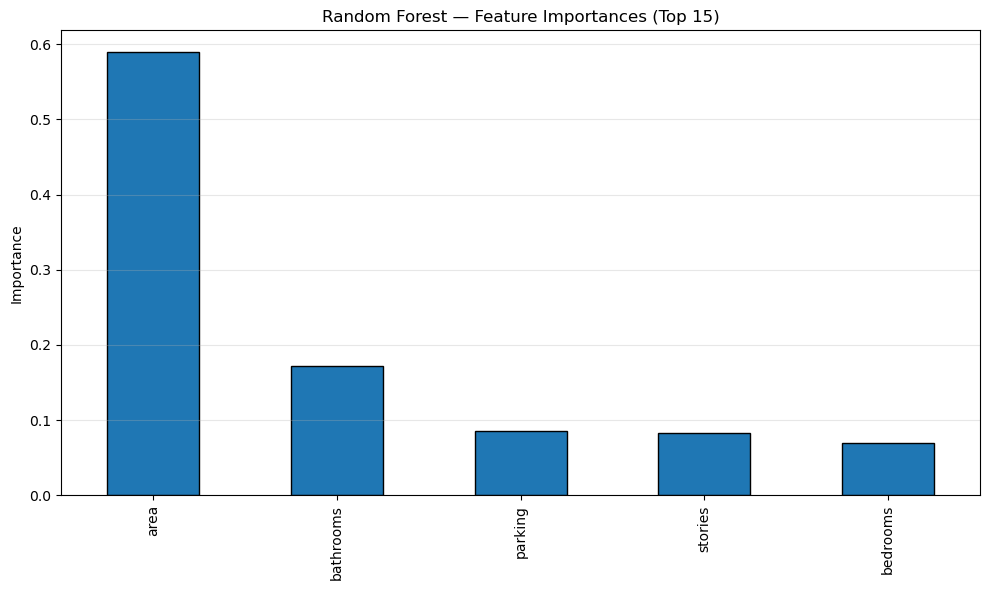

,importance
area,0.588932
bathrooms,0.172192
parking,0.085364
stories,0.083396
bedrooms,0.070115


In [12]:
importances = pd.Series(model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.head(15).plot(kind="bar", edgecolor="black")
plt.title("Random Forest — Fыeature Importances (Top 15)")
plt.ylabel("Importance")
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

importances.to_frame("importance").head(20)


In [13]:
N, M = df.shape
report = f"""
## Project: Housing Price Prediction

**Goal**: predict house prices using numeric features.  
**Target**: `{target}` (regression)

### Step 1–2: Data
* Shape: {N} rows, {M} columns

### Cleaning
* Missing numeric values filled with median
* Only numeric features used (no categorical encoding in this version)

### Modeling
* Train/Test split: 80/20
* Models: Linear Regression (with StandardScaler), RandomForest (no scaling)

### Results
* LinearRegression — MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}, MAE: {mae_lr:.2f}, R²: {r2_lr:.3f}
* RandomForest —— MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R²: {r2_rf:.3f}

### Conclusion
* Best by R²: {'RandomForest' if r2_rf >= r2_lr else 'LinearRegression'}
* Next steps: tune RF hyperparameters; add one-hot encoding for categorical features; try Gradient Boosting/GBM/XGBoost.
"""
print(report)



## Project: Housing Price Prediction

**Goal**: predict house prices using numeric features.  
**Target**: `price` (regression)

### Step 1–2: Data
* Shape: 545 rows, 13 columns

### Cleaning
* Missing numeric values filled with median
* Only numeric features used (no categorical encoding in this version)

### Modeling
* Train/Test split: 80/20
* Models: Linear Regression (with StandardScaler), RandomForest (no scaling)

### Results
* LinearRegression — MSE: 2292721545725.37, RMSE: 1514173.55, MAE: 1127483.35, R²: 0.546
* RandomForest —— MSE: 2635279404876.73, RMSE: 1623354.37, MAE: 1160947.71, R²: 0.479

### Conclusion
* Best by R²: LinearRegression
* Next steps: tune RF hyperparameters; add one-hot encoding for categorical features; try Gradient Boosting/GBM/XGBoost.

